In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import dataset
import predictor

In [2]:
data = pd.read_csv('data/EPL_processed_results.csv', index_col=0)

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = dataset.generate_train_val_test_sets(data)

In [5]:
model = predictor.get_model(X_train)

2022-02-26 15:52:06.597281: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                576       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 710
Trainable params: 675
Non-trainable params: 35
_________________________________________________________________
None


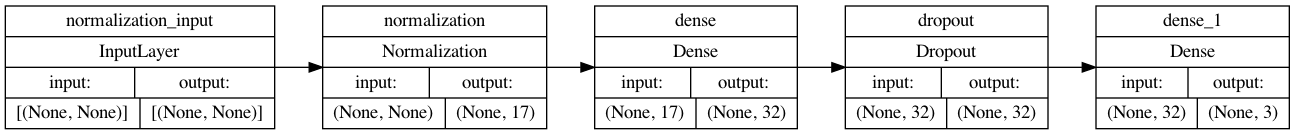

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, callbacks=[callback])

Epoch 1/50
89/89 [==============================] - 2s 6ms/step - loss: 1.2297 - accuracy: 0.3776 - val_loss: 1.0617 - val_accuracy: 0.4852
Epoch 2/50
89/89 [==============================] - 0s 3ms/step - loss: 1.0360 - accuracy: 0.4849 - val_loss: 1.0255 - val_accuracy: 0.5260
Epoch 3/50
89/89 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.5056 - val_loss: 1.0176 - val_accuracy: 0.5246
Epoch 4/50
89/89 [==============================] - 0s 4ms/step - loss: 1.0094 - accuracy: 0.5067 - val_loss: 1.0114 - val_accuracy: 0.5316
Epoch 5/50
89/89 [==============================] - 0s 3ms/step - loss: 0.9959 - accuracy: 0.5137 - val_loss: 1.0100 - val_accuracy: 0.5288
Epoch 6/50
89/89 [==============================] - 0s 3ms/step - loss: 0.9943 - accuracy: 0.5120 - val_loss: 1.0067 - val_accuracy: 0.5373
Epoch 7/50
89/89 [==============================] - 0s 3ms/step - loss: 0.9862 - accuracy: 0.5225 - val_loss: 1.0076 - val_accuracy: 0.5345
Epoch 8/50
89/89 [==

In [16]:
results = model.evaluate(X_test, y_test, batch_size=32)

7/7 [==============================] - 0s 3ms/step - loss: 0.9961 - accuracy: 0.5467


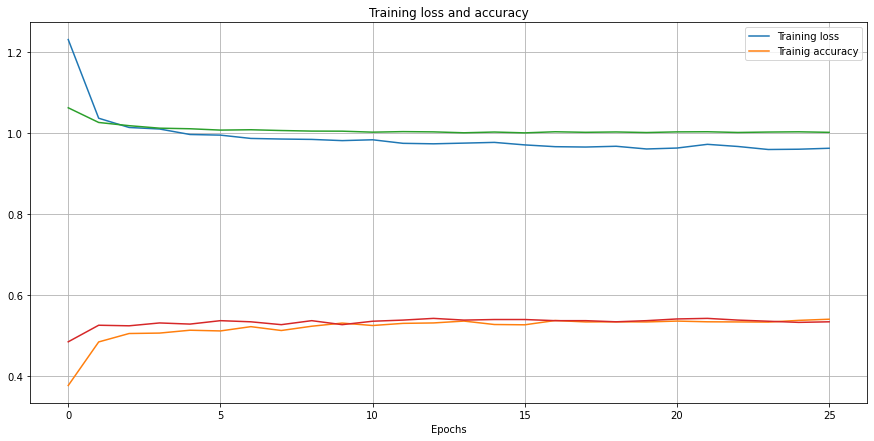

In [17]:
ax = pd.DataFrame(data=history.history).plot(figsize=(15, 7))
ax.grid()
_ = ax.set(title="Training loss and accuracy", xlabel="Epochs")
_ = ax.legend(["Training loss", "Training accuracy"])